# Team doubleE -- Task 1 Report
Team Members: Andrew Wunderlich, Jay Desai, Miles Leonard-Albert
CSCE585 - Machine Learning Systemms, Fall 2020
Adversarial ML Project

This report provides insight and analysis into Task 1, in which we create adversarial examples using the Athena framework.

## Import packages and define project directory

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
projectdir = 'C:/Users/andre/CSCE585_local/project-athena'
if os.path.isdir(projectdir):
    print('Selected project directory: '+projectdir)
else:
    raise NotADirectoryError('The selected project directory does not exist. '+
                             'Check the value of "projectdir" and ensure that it contains the correct project path.')

Selected project directory: C:/Users/andre/CSCE585_local/project-athena


## Run Plots 

df_eps0.03.npy


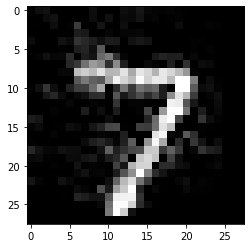

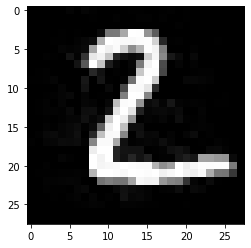

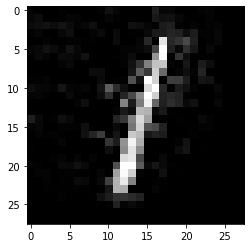

df_eps0.07.npy


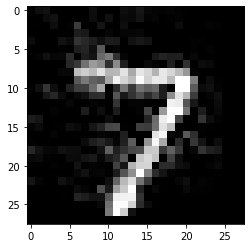

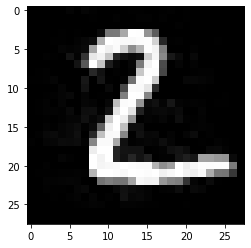

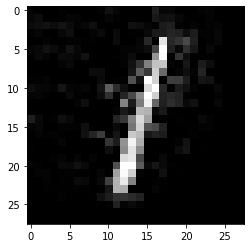

df_eps0.1.npy


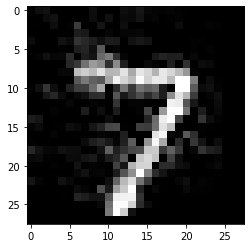

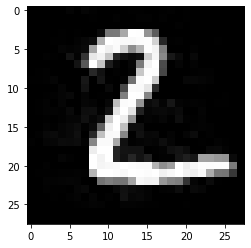

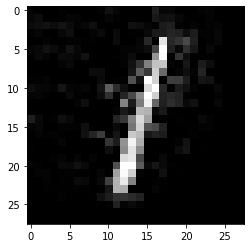

df_eps0.2.npy


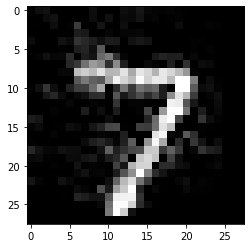

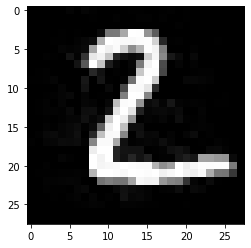

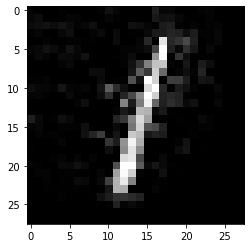

df_eps0.3.npy


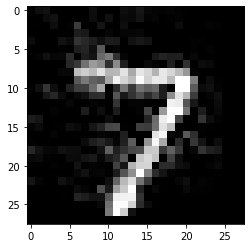

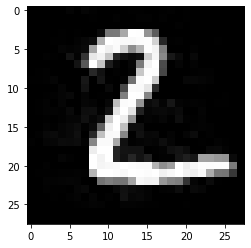

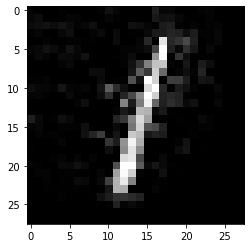

pgd_eps0.03.npy


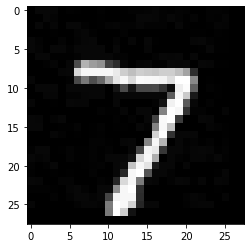

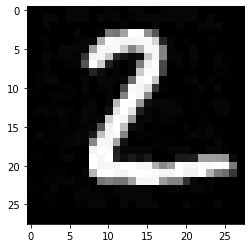

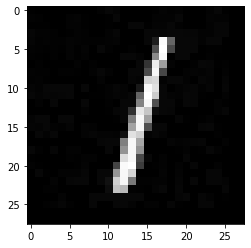

pgd_eps0.07.npy


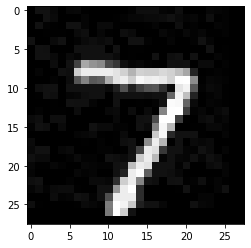

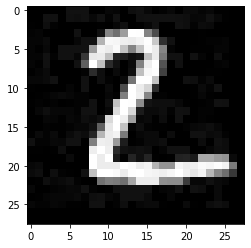

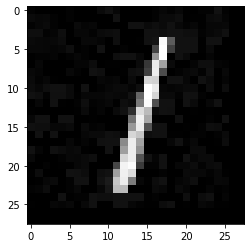

pgd_eps0.1.npy


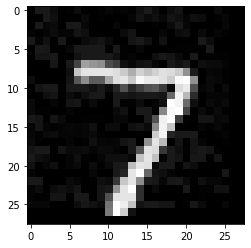

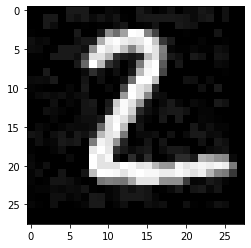

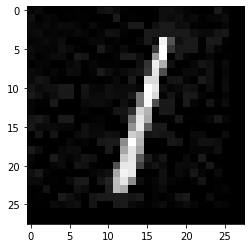

pgd_eps0.2.npy


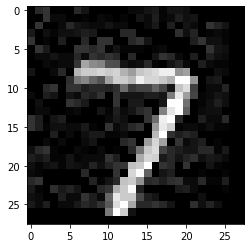

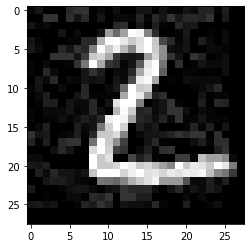

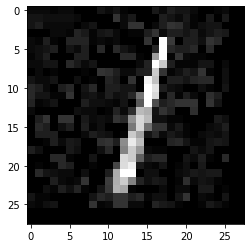

pgd_eps0.3.npy


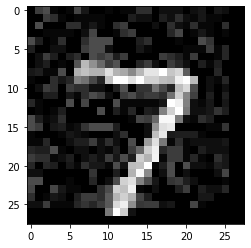

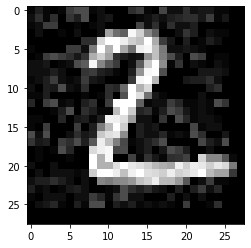

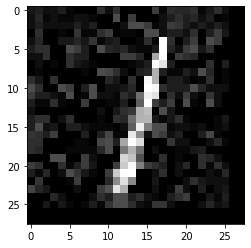

spatial_maxrot10.npy


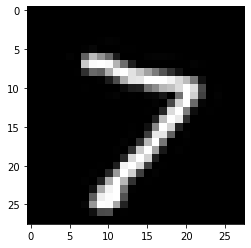

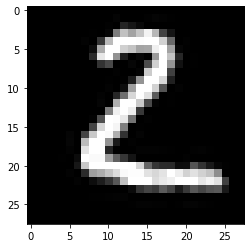

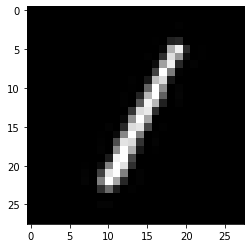

spatial_maxrot20.npy


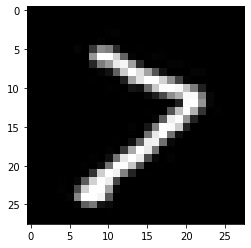

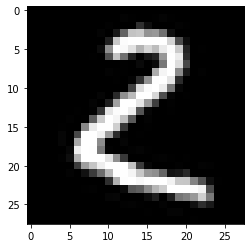

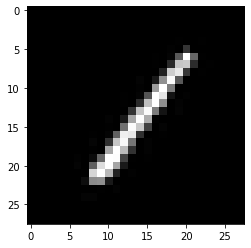

spatial_maxrot30.npy


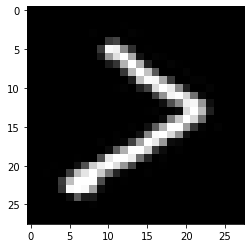

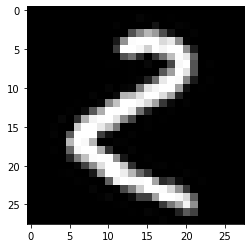

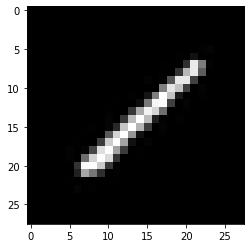

spatial_maxrot40.npy


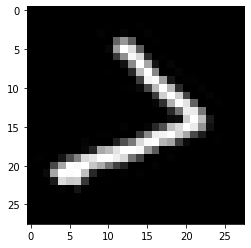

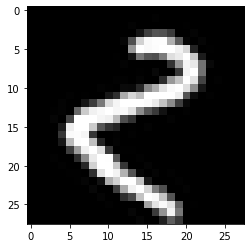

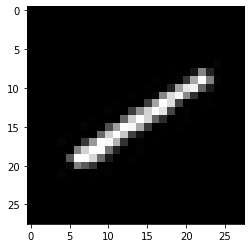

spatial_maxrot50.npy


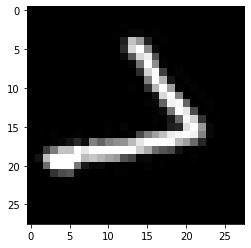

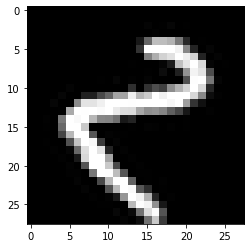

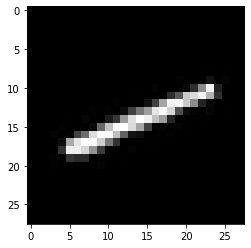

In [3]:
AE_file_list = os.listdir(projectdir+'/saved_attacks') #create list of presaved attack files

if 'dataTable.npy' in AE_file_list:
    AE_file_list.remove('dataTable.npy')

for filename in AE_file_list:
    ae = np.load(projectdir+'/saved_attacks/'+filename)
    print(filename)
    
    num_plotting = min(ae.shape[0], 3)
    for i in range(num_plotting):
        img = ae[i].reshape((28, 28))
        plt.imshow(img, cmap='gray')
        #title = '{}: {}->{}'.format(attack_configs.get(key).get("description"), labels[i], predictions[i])
        #plt.title(title)
        plt.show()
        plt.close()
        


## Analyze error rate by attack type

In [4]:
dataTable = np.load(projectdir+'/saved_attacks/dataTable.npy')

truelabels = dataTable[:,0]
predictedlabels = dataTable[:,1:]

num_images = predictedlabels.shape[0]
num_attacks = predictedlabels.shape[1]

In [5]:
errortable = -np.ones(predictedlabels.shape) #initialize to -1's
all_err_rates = -np.ones([1,predictedlabels.shape[1]]) #initialize to -1's

for col_index in range(predictedlabels.shape[1]): #step through columns (each column is data for one attack)
    errortable[:,col_index] = np.logical_not(np.equal(predictedlabels[:,col_index],truelabels))*1.0 #create binary matrix of errors
    all_err_rates[0,col_index] = np.average(errortable[:,col_index]) #compute average error rate for each attack
